In [2]:
%%capture
%pip install wget

In [ ]:
#下載字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

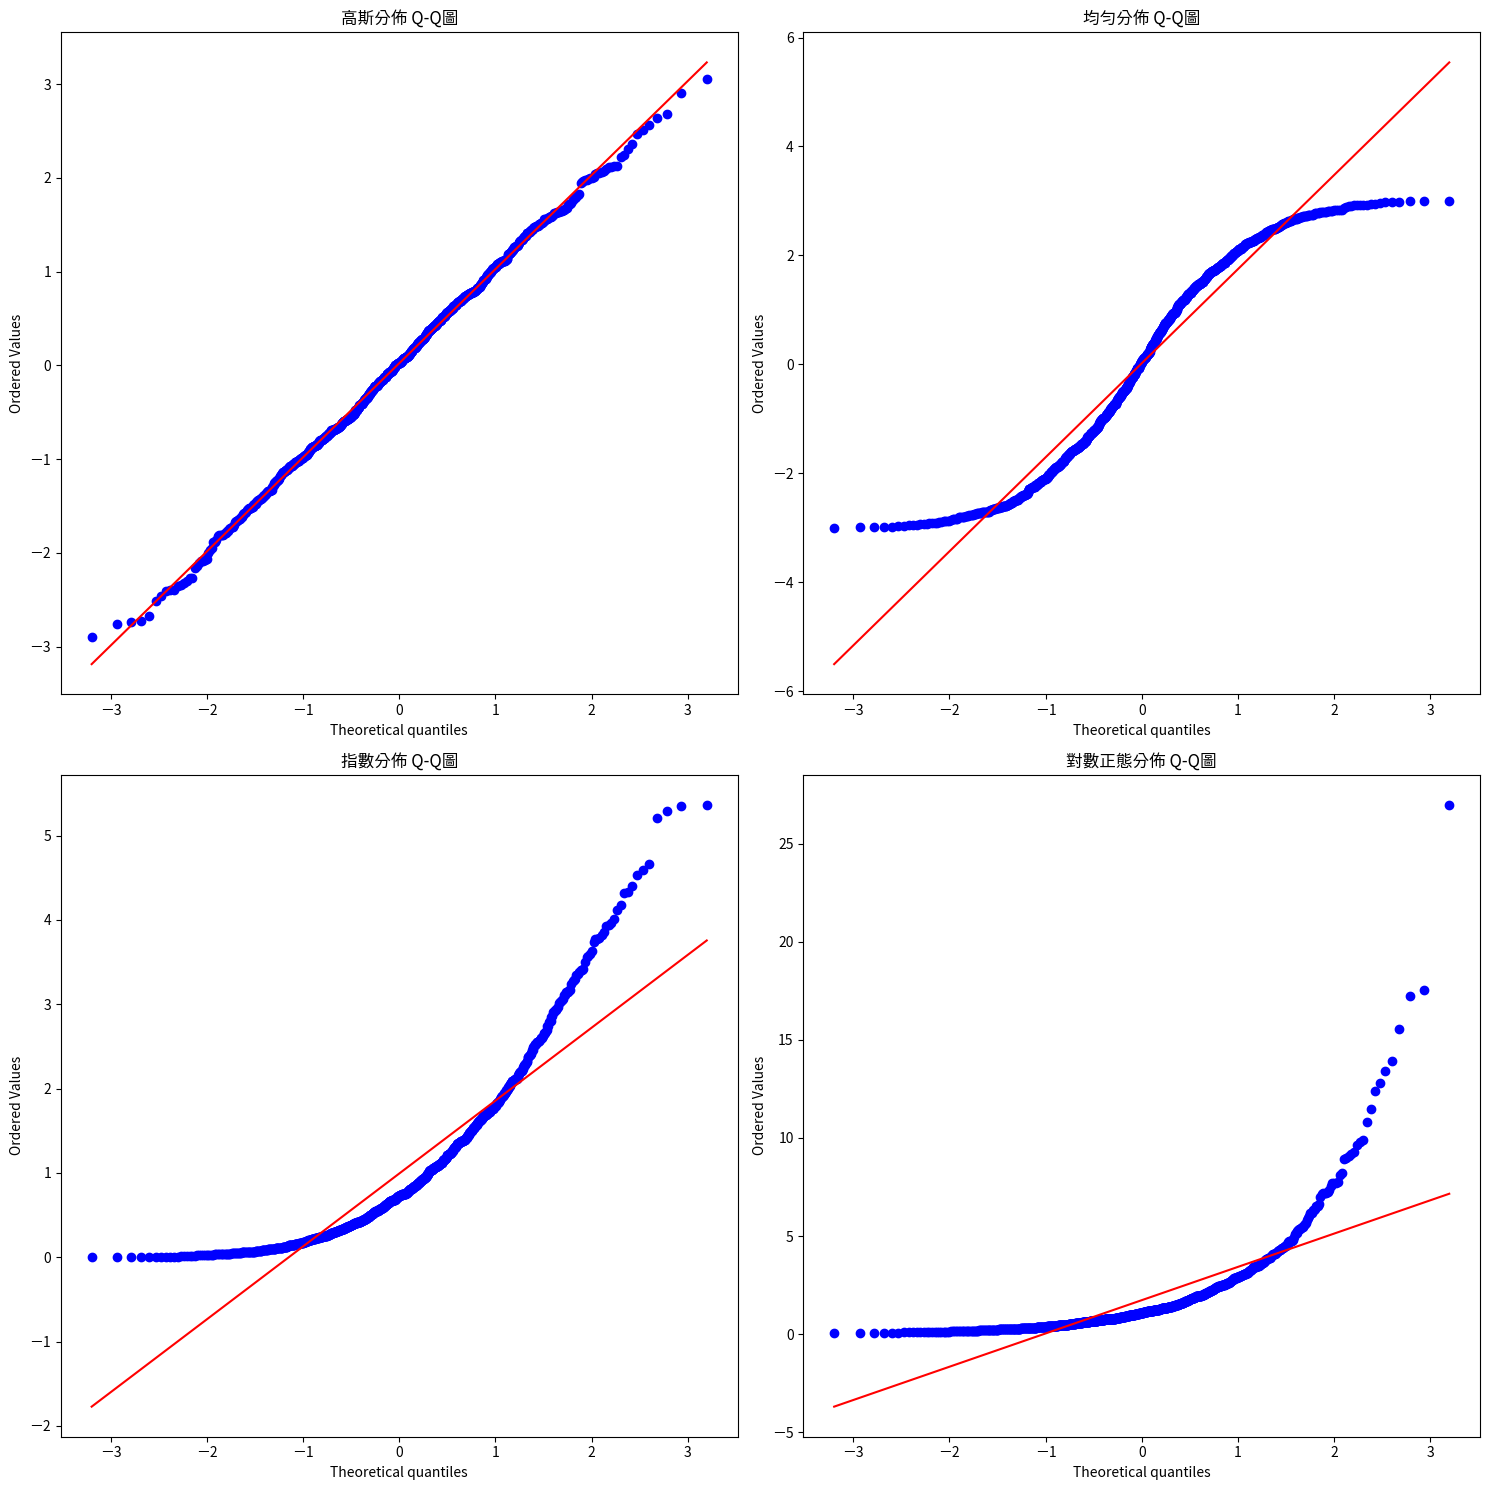

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mlp
from matplotlib.font_manager import fontManager

#載入中文字型
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 創建2x2子圖
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# 生成不同分佈的數據
normal_data = np.random.normal(loc=0, scale=1, size=1000)  # 高斯分佈
uniform_data = np.random.uniform(low=-3, high=3, size=1000)  # 均勻分佈
exp_data = np.random.exponential(scale=1.0, size=1000)  # 指數分佈
lognormal_data = np.random.lognormal(mean=0, sigma=1, size=1000)  # 對數正態分佈

# 繪製高斯分佈Q-Q圖
stats.probplot(normal_data, dist='norm', plot=ax1)
ax1.set_title('高斯分佈 Q-Q圖')

# 繪製均勻分佈Q-Q圖
stats.probplot(uniform_data, dist='norm', plot=ax2)
ax2.set_title('均勻分佈 Q-Q圖')

# 繪製指數分佈Q-Q圖
stats.probplot(exp_data, dist='norm', plot=ax3)
ax3.set_title('指數分佈 Q-Q圖')

# 繪製對數正態分佈Q-Q圖
stats.probplot(lognormal_data, dist='norm', plot=ax4)
ax4.set_title('對數正態分佈 Q-Q圖')

# 調整子圖之間的間距
plt.tight_layout()

plt.show()

除了視覺化的Q-Q圖之外,我們可以使用統計檢定的方法來判斷數據的分佈類型。以下是幾個常用的統計檢定方法:

### 1. Shapiro-Wilk 檢定
- 主要用於檢驗數據是否符合正態分布
- 適用於樣本數小於5000的數據
- 建議使用以下代碼:

Shapiro-Wilk檢定結果:
p-value = 0.8313
數據符合常態分布

KS檢定結果:
p-value = 0.6656
數據符合常態分布


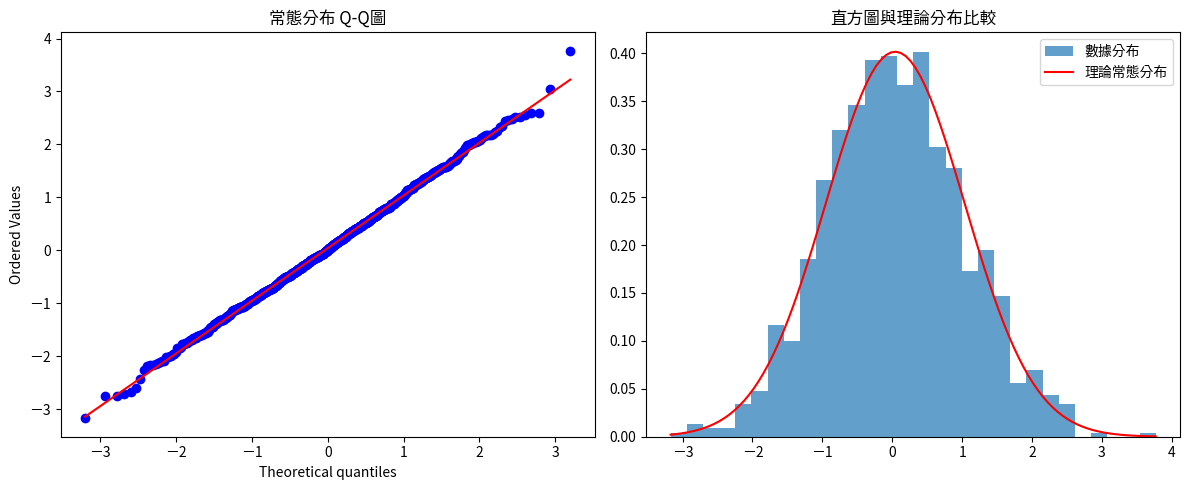

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mlp
from matplotlib.font_manager import fontManager

# 載入中文字型
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 生成測試數據
data = np.random.normal(loc=0, scale=1, size=1000)  # 生成常態分佈數據

# 1. Shapiro-Wilk檢定
statistic_sw, p_value_sw = stats.shapiro(data)
print('Shapiro-Wilk檢定結果:')
print(f'p-value = {p_value_sw:.4f}')
if p_value_sw > 0.05:
    print('數據符合常態分布')
else:
    print('數據不符合常態分布')

# 2. KS檢定
statistic_ks, p_value_ks = stats.kstest(data, 'norm')
print('\nKS檢定結果:')
print(f'p-value = {p_value_ks:.4f}')
if p_value_ks > 0.05:
    print('數據符合常態分布')
else:
    print('數據不符合常態分布')

# 3. 視覺化檢查
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q圖
stats.probplot(data, dist='norm', plot=ax1)
ax1.set_title('常態分布 Q-Q圖')

# 直方圖與理論密度函數
ax2.hist(data, bins=30, density=True, alpha=0.7, label='數據分布')
x = np.linspace(min(data), max(data), 100)
ax2.plot(x, stats.norm.pdf(x, loc=np.mean(data), scale=np.std(data)), 
         'r-', label='理論常態分布')
ax2.set_title('直方圖與理論分布比較')
ax2.legend()

plt.tight_layout()
plt.show()



### 2. Kolmogorov-Smirnov 檢定
- 可以檢驗數據是否符合特定的理論分布
- 適用於連續型分布
- 示例代碼:



KS檢定結果:
p-value = 0.9772
數據符合均勻分布


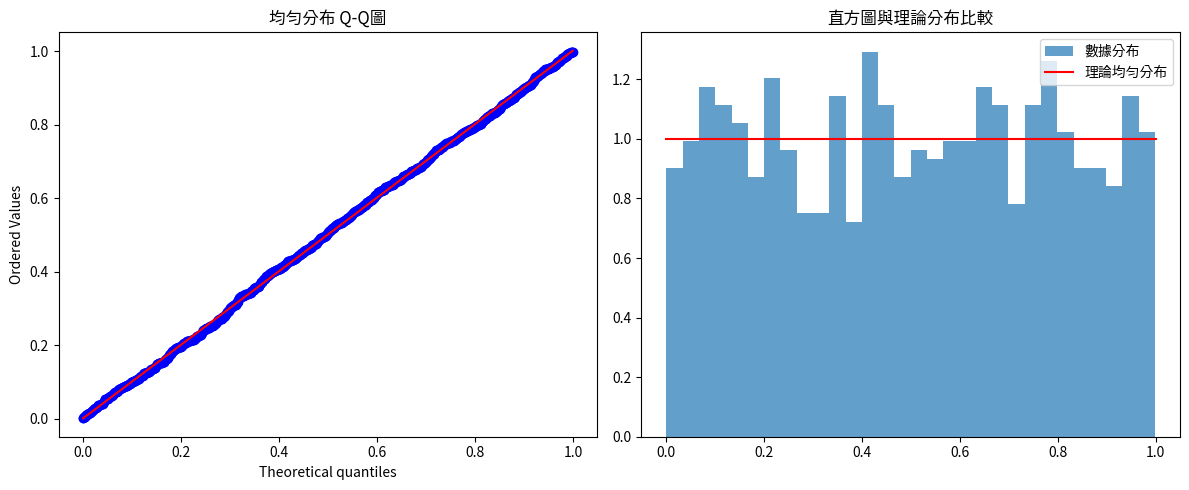

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mlp
from matplotlib.font_manager import fontManager

# 載入中文字型
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 生成測試數據
data = np.random.uniform(low=0, high=1, size=1000)

# 1. KS檢定
statistic, p_value = stats.kstest(data, 'uniform')
print(f'KS檢定結果:')
print(f'p-value = {p_value:.4f}')
if p_value > 0.05:
    print('數據符合均勻分布')
else:
    print('數據不符合均勻分布')

# 2. 視覺化檢查
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q圖
stats.probplot(data, dist='uniform', plot=ax1)
ax1.set_title('均勻分布 Q-Q圖')

# 直方圖與理論密度函數
ax2.hist(data, bins=30, density=True, alpha=0.7, label='數據分布')
x = np.linspace(0, 1, 100)
ax2.plot(x, stats.uniform.pdf(x, 0, 1), 'r-', label='理論均勻分布')
ax2.set_title('直方圖與理論分布比較')
ax2.legend()

plt.tight_layout()
plt.show()

KS檢定結果:
p-value = 0.9035
數據符合指數分布

Anderson-Darling檢定結果:
統計量: 0.3251346696976043
臨界值: [0.921 1.077 1.34  1.605 1.956]
顯著性水平: [15.  10.   5.   2.5  1. ]


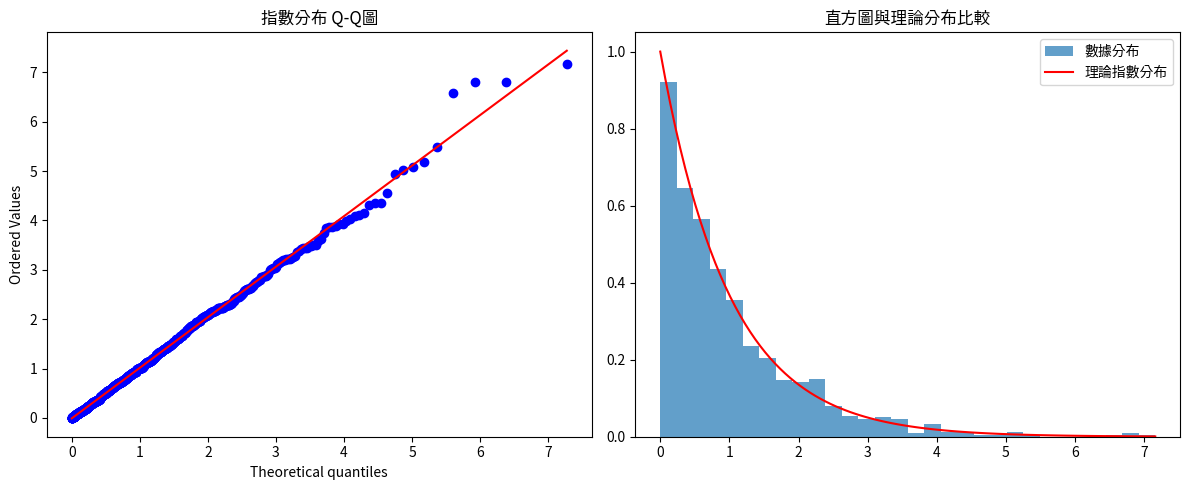

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mlp
from matplotlib.font_manager import fontManager

# 載入中文字型
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 生成測試數據
data = np.random.exponential(scale=1.0, size=1000)

# 1. KS檢定
statistic, p_value = stats.kstest(data, 'expon')
print(f'KS檢定結果:')
print(f'p-value = {p_value:.4f}')
if p_value > 0.05:
    print('數據符合指數分布')
else:
    print('數據不符合指數分布')

# 2. Anderson-Darling檢定
result = stats.anderson(data, dist='expon')
print('\nAnderson-Darling檢定結果:')
print('統計量:', result.statistic)
print('臨界值:', result.critical_values)
print('顯著性水平:', result.significance_level)

# 3. 視覺化檢查
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q圖
stats.probplot(data, dist='expon', plot=ax1)
ax1.set_title('指數分布 Q-Q圖')

# 直方圖與理論密度函數
ax2.hist(data, bins=30, density=True, alpha=0.7, label='數據分布')
x = np.linspace(0, max(data), 100)
ax2.plot(x, stats.expon.pdf(x), 'r-', label='理論指數分布')
ax2.set_title('直方圖與理論分布比較')
ax2.legend()

plt.tight_layout()
plt.show()

KS檢定結果:
p-value = 0.1170
數據符合對數正態分布

Anderson-Darling檢定結果:
統計量: 0.5016663526348566
臨界值: [0.574 0.653 0.784 0.914 1.088]
顯著性水平: [15.  10.   5.   2.5  1. ]


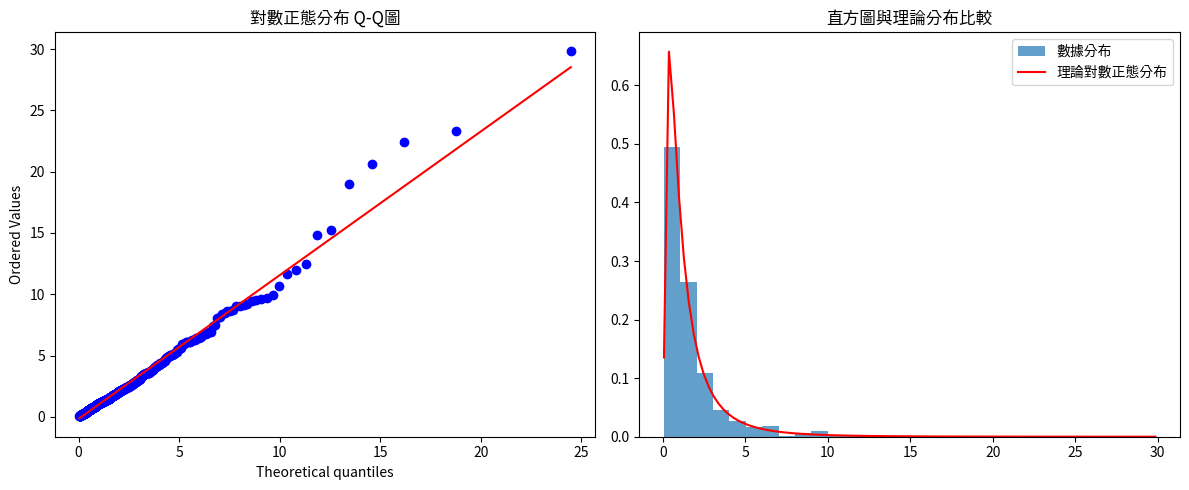

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mlp
from matplotlib.font_manager import fontManager

# 載入中文字型
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 生成測試數據
data = np.random.lognormal(mean=0, sigma=1, size=1000)

# 1. KS檢定
# 注意：lognorm需要設定shape參數s，這裡使用sigma=1
statistic, p_value = stats.kstest(data, 'lognorm', args=(1, 0, 1))
print(f'KS檢定結果:')
print(f'p-value = {p_value:.4f}')
if p_value > 0.05:
    print('數據符合對數正態分布')
else:
    print('數據不符合對數正態分布')

# 2. Anderson-Darling檢定
result = stats.anderson(np.log(data), dist='norm')
print('\nAnderson-Darling檢定結果:')
print('統計量:', result.statistic)
print('臨界值:', result.critical_values)
print('顯著性水平:', result.significance_level)

# 3. 視覺化檢查
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q圖
stats.probplot(data, dist='lognorm', sparams=(1,), plot=ax1)
ax1.set_title('對數正態分布 Q-Q圖')

# 直方圖與理論密度函數
ax2.hist(data, bins=30, density=True, alpha=0.7, label='數據分布')
x = np.linspace(min(data), max(data), 100)
ax2.plot(x, stats.lognorm.pdf(x, s=1, loc=0, scale=1), 'r-', label='理論對數正態分布')
ax2.set_title('直方圖與理論分布比較')
ax2.legend()

plt.tight_layout()
plt.show()